Indians and elections are the things which keeps on happening almost every month and every year.
Well, Loksabha elections is one such which happens after every 5 years, well we have data of
candidates and electors from 2009 and 2014. Compare the dataset and compute the results visually
1. Create grand alliances
a. 'INC','NCP', 'RJD', 'DMK', 'IUML',
'JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD' as UPA
b. 'BJP','SS', 'LJP', 'SAD', 'RLSP',
'AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS','KM
DK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJ
S','AGP','JSS','PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF' as
NDA
c. 'YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM',
'KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL',
'JVM','MDMK' as Others
2. Create Winning seats distribution by Major Political Parties & Alliances for 2009 & 2014
3. How many seats won by Alliances and Major Political Parties ?

4. Plot comparatively seats won based on candidate category as General, ST and SC for 2009 &
2014
5. Plot the age distribution of winners of both 2014 and 2009 elections
6. Separately plot age distribution of NDA & UPA candidates
7. Plot Gender distributions of 2009 & 2014 elections
8. Plot gender distribution of NDA and UPA separately for 2009 elections
9. Plot gender distribution of NDA and UPA separately for 2014 elections
10. Plot the poll percentage of states for 2009 & 2014 elections

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def check_alliance(prty):
    UPA=['INC','NCP', 'RJD', 'DMK', 'IUML','JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD']
    NDA=['BJP','SS', 'LJP', 'SAD', 'RLSP','AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS',
         'KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT','MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS',
         'PPA','UDP','HSPDP','PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF']
    Others=['YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI', 'AIMIM','KEC(M)','SWP', 'NPEP', 'JKN',
            'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL','JVM','MDMK' ]
    
    if prty in NDA:
        return 'NDA'
    elif prty in UPA:
        return 'UPA'
    elif prty in Others:
        return 'Others'
    #elif prty=="NOTA":
    #    return prty
    else:
        return "No Alliance"
    


In [3]:
elector_09= pd.read_csv('LS2009Electors.csv')
candidate_09=pd.read_csv('LS2009Candidate.csv')

candidate_09.dropna(axis=0, inplace= True)

elector_14= pd.read_csv('LS2014Electors.csv')
candidate_14=pd.read_csv('LS2014Candidate.csv')

candidate_14['Candidate Category'].fillna('NA', inplace=True)
candidate_14['Candidate Category']=candidate_14['Candidate Category'].apply(lambda x: x.upper())

candidate_df=pd.concat([candidate_09, candidate_14])




1. Create grand alliances

a. 'INC','NCP', 'RJD', 'DMK', 'IUML','JMM','JD(s)','KC(M)','RLD','RSP','CMP(J)','KC(J)','PPI','MD' as UPA

b. 'BJP','SS', 'LJP', 'SAD', 'RLSP','AD','PMK','NPP','AINRC','NPF','RPI(A)','BPF','JD(U)','SDF','NDPP','MNF','RIDALOS',
'KMDK','IJK','PNK','JSP','GJM','MGP','GFP','GVP','AJSU','IPFT',
'MPP','KPP','JKPC','KC(T)','BDJS','AGP','JSS','PPA','UDP','HSPDP',
'PSP','JRS','KVC','PNP','SBSP','KC(N)','PDF','MDPF' as NDA

c. 'YSRCP','AAAP', 'IND', 'AIUDF', 'BLSP', 'JKPDP', 'JD(S)', 'INLD', 'CPI',
 'AIMIM','KEC(M)','SWP', 'NPEP', 'JKN', 'AIFB', 'MUL', 'AUDF', 'BOPF', 'BVA', 'HJCBL','JVM','MDMK' as Others

In [4]:
candidate_09['Alliance']= candidate_09['Party Abbreviation'].apply(check_alliance)
candidate_14['Alliance']= candidate_14['Party Abbreviation'].apply(check_alliance)

##all
#candidate_df['Alliance']= candidate_df['Party Abbreviation'].apply(check_alliance)

2. Create Winning seats distribution by Major Political Parties & Alliances for 2009 & 2014

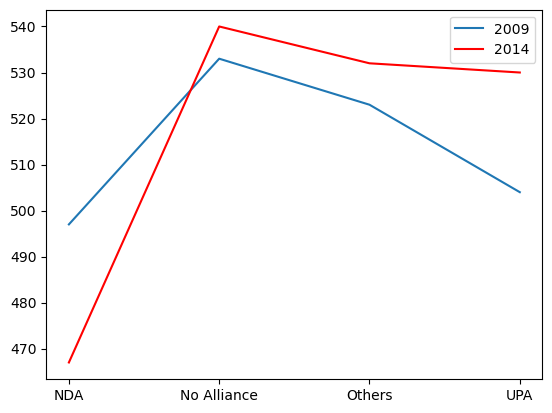

"\nplt.plot(winner09_by_party, label='2009')\nplt.plot(winner14_by_party, label='2014', color='red')\nplt.legend()\nplt.show()\n"

In [5]:
#idx= candidate_09.groupby(by=['Alliance','PC name'])['Total Votes Polled'].transform(max) == candidate_09['Total Votes Polled']
#Winner_each_PC=candidate_09[idx]

Winner_09=candidate_09.sort_values('Total Votes Polled', ascending=False).drop_duplicates(['Alliance', 'PC name'])
Winner_14=candidate_14.sort_values('Total Votes Polled', ascending=False).drop_duplicates(['Alliance', 'PC name'])

winner09_by_alliance=Winner_09.groupby('Alliance')['PC name'].count()
winner14_by_alliance=Winner_14.groupby('Alliance')['PC name'].count()

plt.plot(winner09_by_alliance, label='2009')
plt.plot(winner14_by_alliance, label='2014', color='red')
plt.legend()
plt.show()

winner09_by_party=Winner_09.groupby('Party Abbreviation')['PC name'].count()
winner14_by_party=Winner_14.groupby('Party Abbreviation')['PC name'].count()

'''
plt.plot(winner09_by_party, label='2009')
plt.plot(winner14_by_party, label='2014', color='red')
plt.legend()
plt.show()
'''


3. How many seats won by Alliances and Major Political Parties ?

In [6]:
print(winner09_by_alliance)
print(winner09_by_party)
print(winner14_by_alliance)
print(winner14_by_party)

Alliance
NDA            497
No Alliance    533
Others         523
UPA            504
Name: PC name, dtype: int64
Party Abbreviation
ABHM      1
ABMSD     1
AC        1
ACNC      1
AD        2
         ..
SWP       1
TDP      27
TRS       8
UDP       1
UGDP      1
Name: PC name, Length: 92, dtype: int64
Alliance
NDA            467
No Alliance    540
Others         532
UPA            530
Name: PC name, dtype: int64
Party Abbreviation
AAAP     163
AD         2
ADMK      40
AIFB       4
AIMIM      2
        ... 
TRS       14
UDP        1
YSRCP     31
nuzp       2
pjdl       1
Name: PC name, Length: 68, dtype: int64


4. Plot comparatively seats won based on candidate category as General, ST and SC for 2009 &
2014

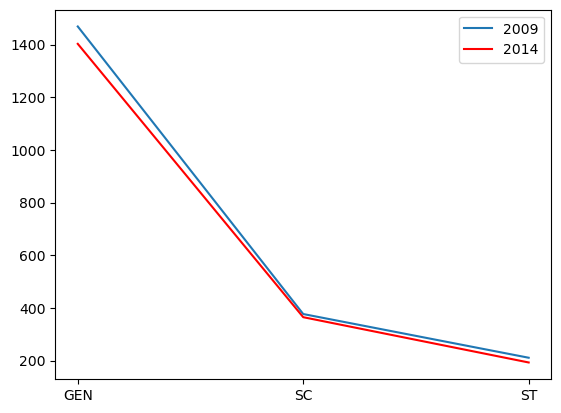

In [7]:


Winner_14=Winner_14[Winner_14['Candidate Category']!='NA']
winner09_by_cat=Winner_09.groupby('Candidate Category')['PC name'].count()
winner14_by_cat=Winner_14.groupby('Candidate Category')['PC name'].count()

plt.plot(winner09_by_cat, label='2009')
plt.plot(winner14_by_cat, label='2014', color='red')
plt.legend()
plt.show()

5. Plot the age distribution of winners of both 2014 and 2009 elections


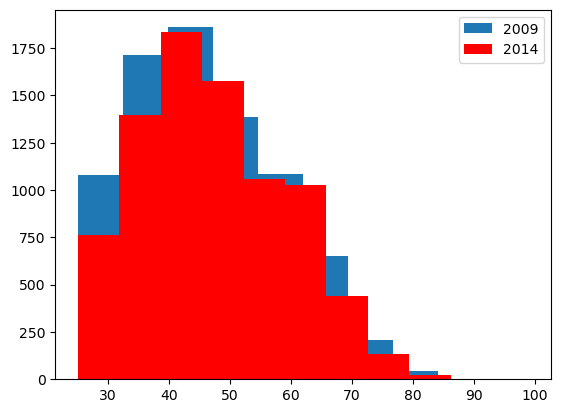

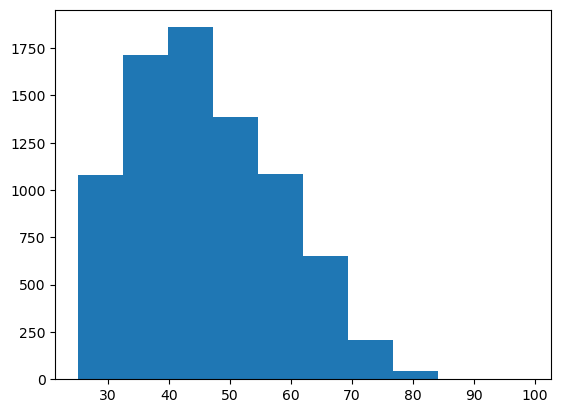

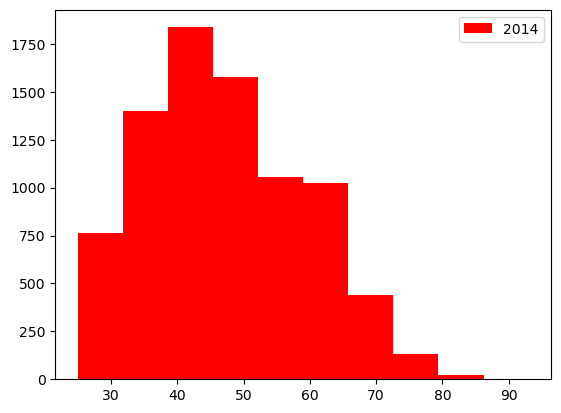

In [8]:
plt.hist(candidate_09['Candidate Age'], bins=10, label="2009")
new_candidate_14= candidate_14.dropna()
plt.hist(new_candidate_14['Candidate Age'], bins=10, label="2014", color='red')
plt.legend()
plt.show()


##OR

plt.hist(candidate_09['Candidate Age'], bins=10, label="2009")
new_candidate_14= candidate_14.dropna()
plt.show()
plt.hist(new_candidate_14['Candidate Age'], bins=10, label="2014", color='red')
plt.legend()
plt.show()

6. Separately plot age distribution of NDA & UPA candidates


/tmp/ipykernel_28064/317412561.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NDA_can_14= candidate_09[candidate_14['Alliance']=="NDA"]
/tmp/ipykernel_28064/317412561.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  UPA_can_14= candidate_09[candidate_14['Alliance']=="UPA"]


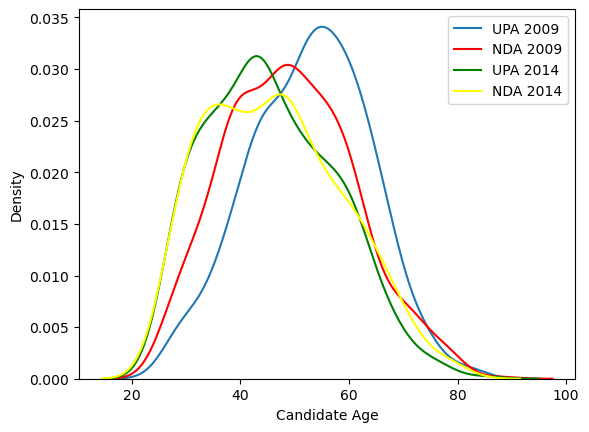

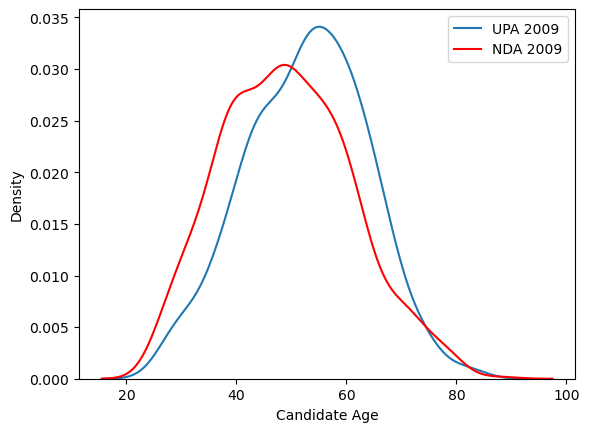

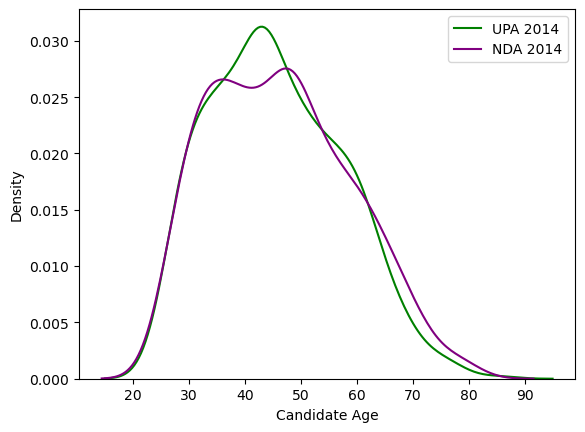

In [9]:
NDA_can_09= candidate_09[candidate_09['Alliance']=="NDA"]
UPA_can_09= candidate_09[candidate_09['Alliance']=="UPA"]
NDA_can_14= candidate_09[candidate_14['Alliance']=="NDA"]
UPA_can_14= candidate_09[candidate_14['Alliance']=="UPA"]

sns.kdeplot(UPA_can_09['Candidate Age'], label='UPA 2009')
sns.kdeplot(NDA_can_09['Candidate Age'], color='red', label='NDA 2009')
sns.kdeplot(UPA_can_14['Candidate Age'], color='green', label='UPA 2014')
sns.kdeplot(NDA_can_14['Candidate Age'], color='yellow', label='NDA 2014')
plt.legend()
plt.show()

##OR
sns.kdeplot(UPA_can_09['Candidate Age'], label='UPA 2009')
sns.kdeplot(NDA_can_09['Candidate Age'], color='red', label='NDA 2009')
plt.legend()
plt.show()
sns.kdeplot(UPA_can_14['Candidate Age'], color='green', label='UPA 2014')
sns.kdeplot(NDA_can_14['Candidate Age'], color='purple', label='NDA 2014')
plt.legend()
plt.show()

7. Plot Gender distributions of 2009 & 2014 elections


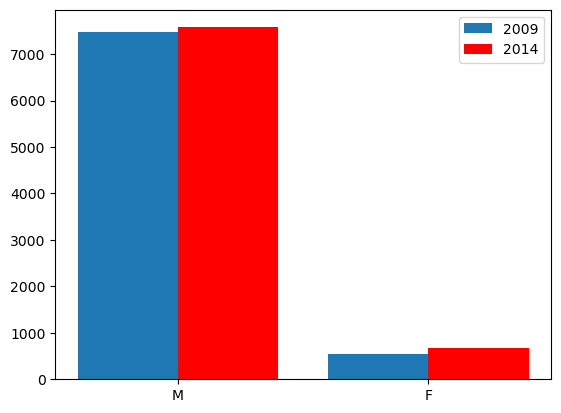

In [98]:
gender09=candidate_09['Candidate Sex'].value_counts()
gender14=candidate_14['Candidate Sex'].value_counts()[:2]

ind=np.arange(2)


plt.bar(ind-0.2,gender09, 0.4,label='2009')
plt.bar(ind+0.2,gender14, 0.4,label='2014',color="red")
plt.xticks(ind,['M','F'])
plt.legend() 
plt.show() 



8. Plot gender distribution of NDA and UPA separately for 2009 elections


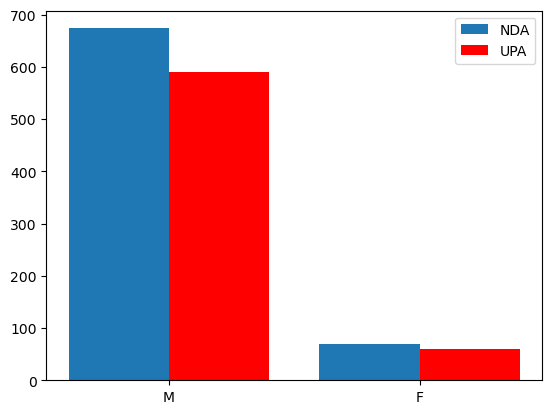

In [104]:
genNDA_09=NDA_can_09['Candidate Sex'].value_counts()
genUPA_09=UPA_can_09['Candidate Sex'].value_counts()

ind=np.arange(2)


plt.bar(ind-0.2,genNDA_09, 0.4,label='NDA')
plt.bar(ind+0.2,genUPA_09, 0.4,label='UPA',color="red")
plt.xticks(ind,['M','F'])
plt.legend() 
plt.show() 

9. Plot gender distribution of NDA and UPA separately for 2014 elections


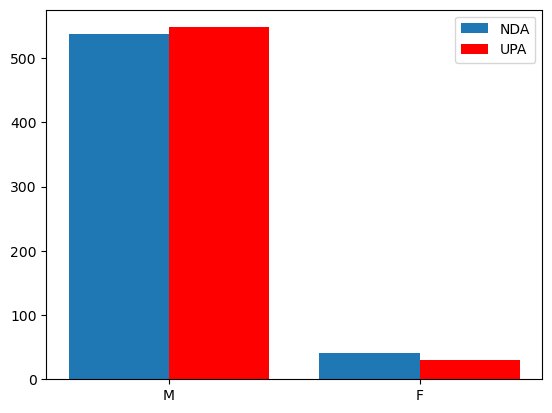

In [105]:
genNDA_14=NDA_can_14['Candidate Sex'].value_counts()
genUPA_14=UPA_can_14['Candidate Sex'].value_counts()

ind=np.arange(2)

plt.bar(ind-0.2,genNDA_14, 0.4,label='NDA')
plt.bar(ind+0.2,genUPA_14, 0.4,label='UPA',color="red")
plt.xticks(ind,['M','F'])
plt.legend() 
plt.show() 

10. Plot the poll percentage of states for 2009 & 2014 elections

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli'),
  Text(8, 0, 'Daman & Diu'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Lakshadweep'),
  Text(18, 0, 'Madhya Pradesh'),
  Text(19, 0, 'Maharashtra'),
  Text(20, 0, 'Manipur'),
  Text(21, 0, 'Meghalaya'),
  Text(22, 0, 'Mizoram'),
  Text(23, 0, 'NCT OF Delhi'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Orissa'),
  Text(26, 0, 'Puducherry'),
  Text(27, 

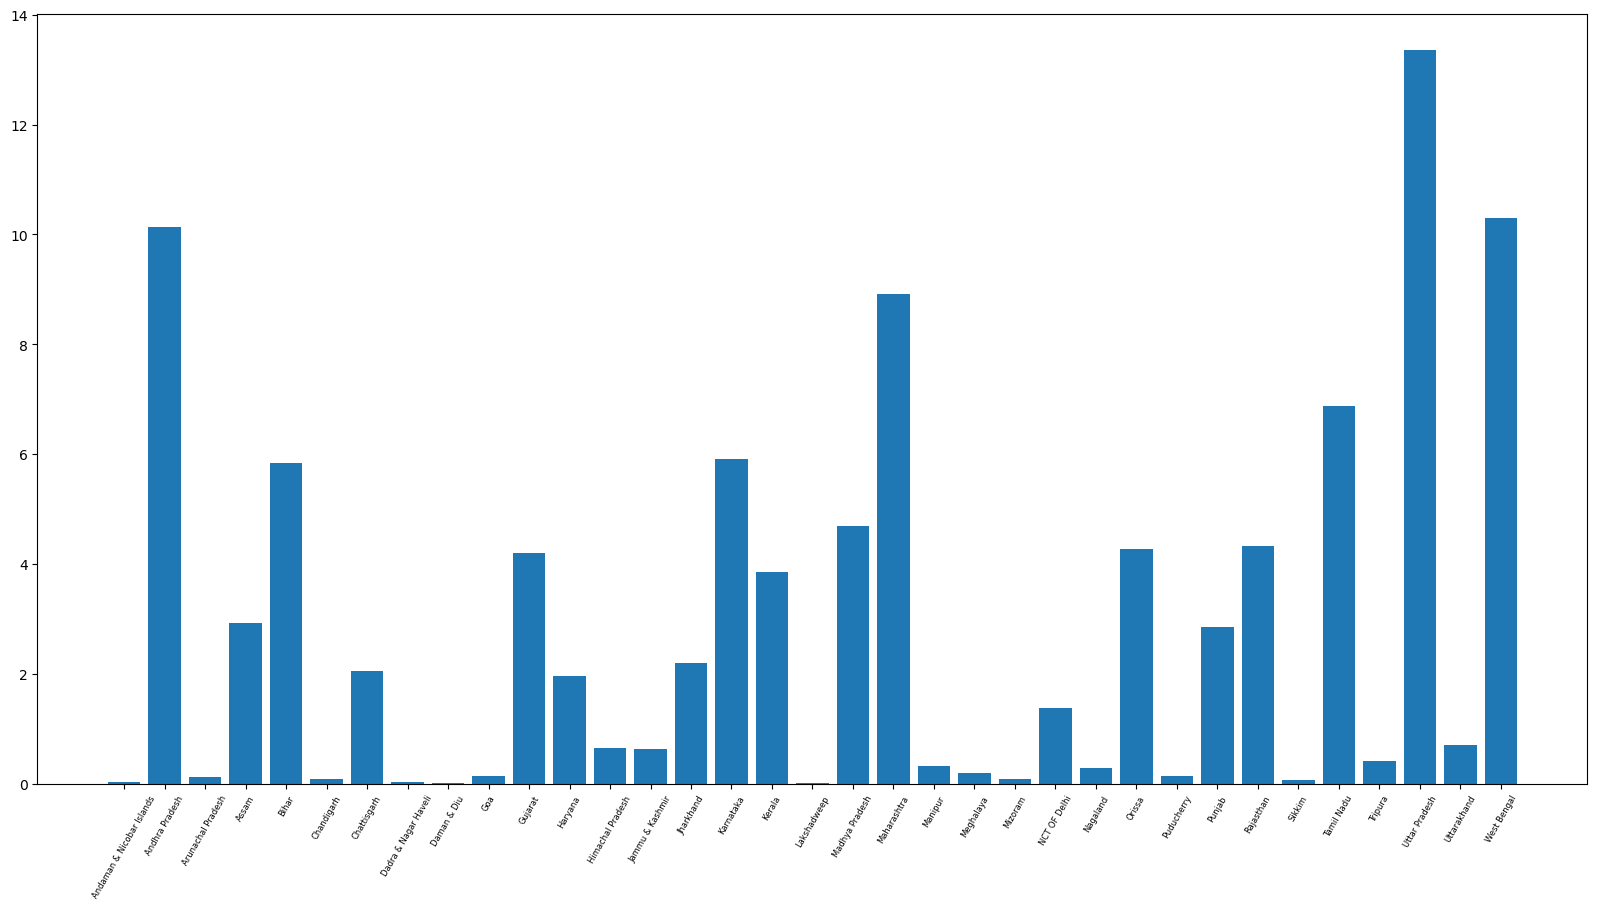

In [44]:
state_percent=candidate_09.groupby('State name')['Total Votes Polled'].sum()
total_vote=state_percent.sum()

Voting_percent=state_percent.apply(lambda x: x/total_vote*100)
#plt.pie(Voting_percent,labels=Voting_percent.index)
#plt.legend
plt.figure(figsize=(20,10))
plt.bar(height=Voting_percent,x=Voting_percent.index)

plt.xticks(fontsize=6,rotation=60)


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, 'Andaman & Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chattisgarh'),
  Text(7, 0, 'Dadra & Nagar Haveli'),
  Text(8, 0, 'Daman & Diu'),
  Text(9, 0, 'Goa'),
  Text(10, 0, 'Gujarat'),
  Text(11, 0, 'Haryana'),
  Text(12, 0, 'Himachal Pradesh'),
  Text(13, 0, 'Jammu & Kashmir'),
  Text(14, 0, 'Jharkhand'),
  Text(15, 0, 'Karnataka'),
  Text(16, 0, 'Kerala'),
  Text(17, 0, 'Lakshadweep'),
  Text(18, 0, 'Madhya Pradesh'),
  Text(19, 0, 'Maharashtra'),
  Text(20, 0, 'Manipur'),
  Text(21, 0, 'Meghalaya'),
  Text(22, 0, 'Mizoram'),
  Text(23, 0, 'NCT OF Delhi'),
  Text(24, 0, 'Nagaland'),
  Text(25, 0, 'Odisha'),
  Text(26, 0, 'Puducherry'),
  Text(27, 

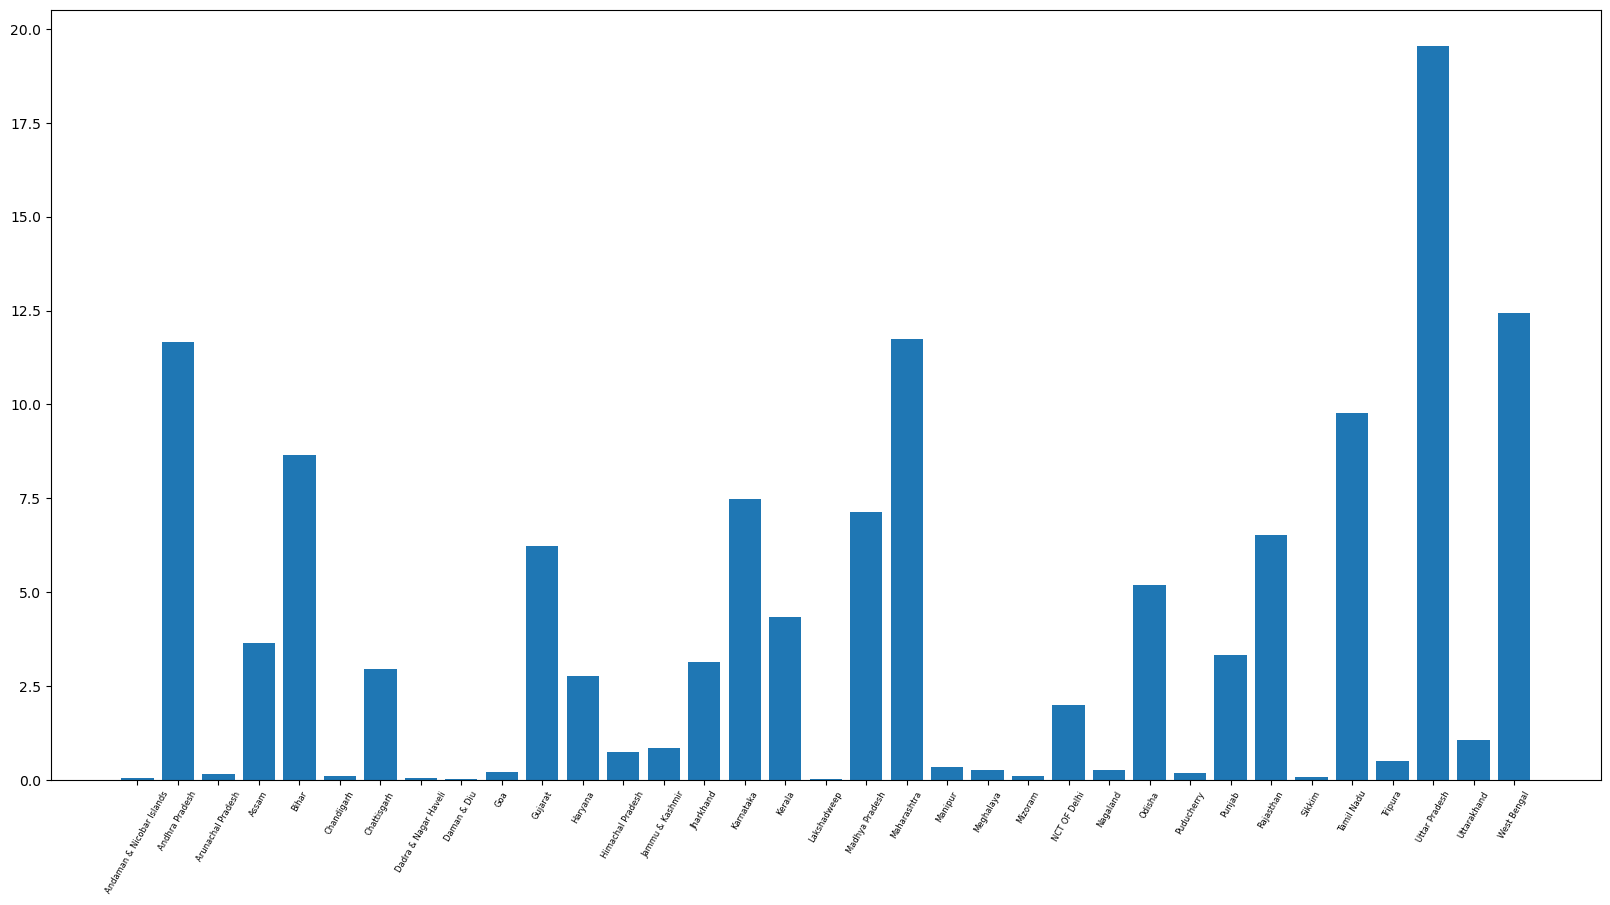

In [45]:
state_percent_14=candidate_14.groupby('State name')['Total Votes Polled'].sum()
total_vote_14=state_percent_14.sum()

Voting_percent14=state_percent_14.apply(lambda x: x/total_vote*100)
#plt.pie(Voting_percent,labels=Voting_percent.index)
#plt.legend
plt.figure(figsize=(20,10))
plt.bar(height=Voting_percent14,x=Voting_percent14.index)

plt.xticks(fontsize=6,rotation=60)